# 深層学習day1

# 入力層～中間層

### ニューラルネットワークの全体像
* 大きく「入力層」「中間層」「出力層」に分類される
* ニューロン(入力の線形変換を含む1つの処理単位)がネットワークを形成している
___

### 確認テスト①

#### Q.
ディープラーニングは、結局何をやろうとしているか2行以内で述べよ。\
また、次の中のどの値の最適化が最終目的か。全て選べ。\
①入力値[X]、②出力値[Y]、③重み[W]、④バイアス[b]\
⑤総入力[u]、⑥中間層入力[z]、⑦学習率[ρ]

#### A.
* 入力されたパラメータから出力値に対する最適な変換値を自動で求める
* ③重み[W]と④バイアス[b]
____

### 確認テスト②
#### Q.
次のネットワークを紙にかけ。\
入力層︓2ノード1層\
中間層︓3ノード2層\
出力層︓1ノード1層

#### A.
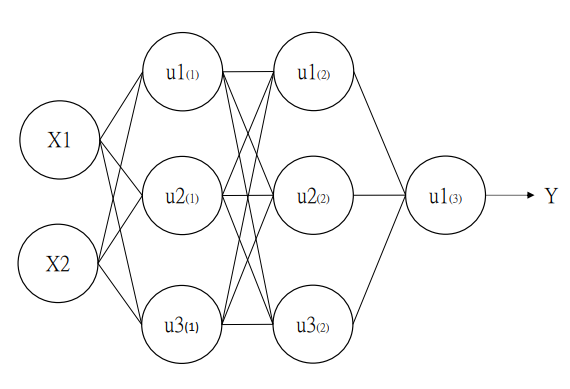
* Excelで描いた
___

### ニューラルネットワークでできること
回帰分析
* 線形回帰
* 回帰木
* ランダムフォレスト
* ニューラルネットワーク

分類分析
* ベイズ分析
* ロジスティック回帰
* 決定木
* ランダムフォレスト
* ニューラルネットワーク
___

### 確認テスト③
#### Q.
この図式に動物分類の実例を入れてみよう。

#### A.
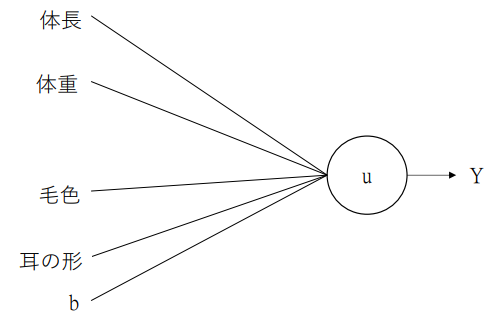
* Excelで描いた
___

### 確認テスト④
#### Q.
この数式をPythonで書け。
$$
\begin{align}
u&=w_1x_1+w_2x_2+w_3x_3+w_4x_4+b\\
&=Wx+b
\end{align}
$$
#### A.
```python
u = np.dot(x, w) + b
```

___

### 確認テスト⑤
#### Q.
1-1のファイルから中間層の出力を定義しているソースを抜き出せ。

#### A.
```python
z = functions.relu(u)
```
* functionsは自作ライブラリとしてimportされている
* 今回は便宜上、適宜実装する
* 中間層なら大抵relu
___

### ハンズオン

In [12]:
import numpy as np

* 必要なライブラリのインポート

In [13]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5],[0.2, 0.4, 0.6]])
    network['W2'] = np.array([[0.1, 0.4],[0.2, 0.5],[0.3, 0.6]])
    network['W3'] = np.array([[0.1, 0.3],[0.2, 0.4]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['b2'] = np.array([0.1, 0.2])
    network['b3'] = np.array([1, 2])
    return network

* ネットワークの初期化関数

In [17]:
def relu(x):
    return np.maximum(0, x)

* relu関数実装

In [20]:
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    u1 = np.dot(x, W1) + b1
    z1 = relu(u1)
    u2 = np.dot(z1, W2) + b2
    z2 = relu(u2)
    u3 = np.dot(z2, W3) + b3
    y = u3
    return y, z1, z2

* 順伝番処理関数

In [25]:
x = np.array([1., 2.])
network =  init_network()
y, z1, z2 = forward(network, x)
print(y)

[1.56  3.222]


* 入力$x$を入れる
* ネットワークの初期化
* 順伝番処理による、出力結果
___

# 活性関数

### 活性化関数
* ニューラルネットワークにおいて、次の層への出力の大きさを決める非線形の関数
* 非線形でない場合、表現力が変わらないので、活性化関数を通す意味がなくなる
___

### 確認テスト⑥
#### Q.
線形と非線形の違いを図にかいて簡易に説明せよ。

#### A.
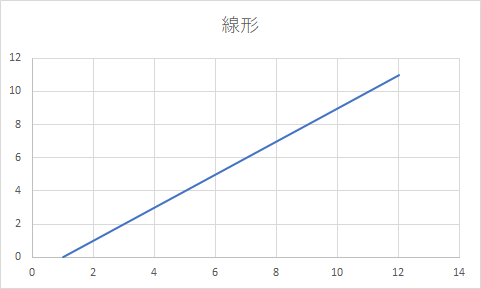

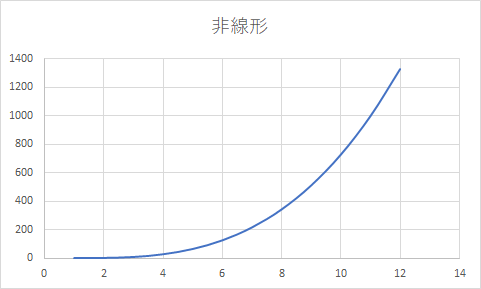

* Excelで描いた
* おおよそ、線形は直線で、比例関係を表現でき、非線形は曲線である
___

### ステップ関数
$$
f(x) = 
\left\{
\begin{array}{ll}1 & (x \geq 0) \\
0 & (x \lt 0)
\end{array}
\right.$$
* しきい値を超えたら発火する関数であり、出力は常に１か０
* パーセプトロン（ニューラルネットワークの前身）で利用された関数
* 0 -1間の間を表現できず、線形分離可能なものしか学習できない
___

### シグモイド関数
$$f(x)=\frac1{1+e^{-x}}$$
* 0 ~ 1の間を緩やかに変化する関数
* 2値分類の出力層に利用される(今では中間層での利用はあまりない)
* 勾配消失問題を引き起こす事がある
___

### Relu関数
$$
f(x) = 
\left\{
\begin{array}{ll}x & (x>0) \\
0 & (x \leq 0)
\end{array}
\right.$$
* 今最も使われている活性化関数
* 勾配消失問題の回避とスパース化に貢献することで良い成果をもたらしている
___

### 確認テスト⑦
#### Q.
配布されたソースコードより該当する箇所を抜き出せ。
#### A.
```python 
z = functions.sigmoid(u)
```
___

### ハンズオン

In [49]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

* 必要なライブラリのインポート

In [50]:
def plt_funcrion(funcrion, x):
    y = funcrion(x)
    plt.plot(x, y)
    plt.show()

* 描画処理用の関数

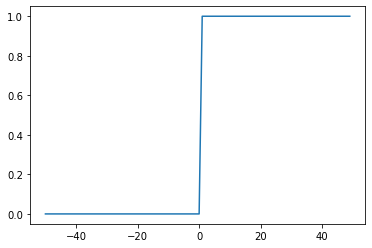

In [47]:
def step_function(x):
    return np.where(x > 0, 1, 0)

x = np.arange(-50, 50)
plt_funcrion(step_function, x)

* ステップ関数

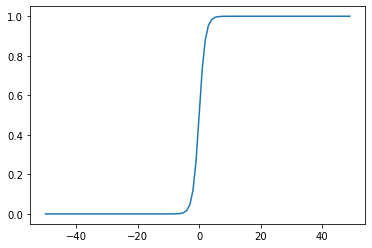

In [53]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

x = np.arange(-50, 50)
plt_funcrion(sigmoid, x)

* シグモイド関数

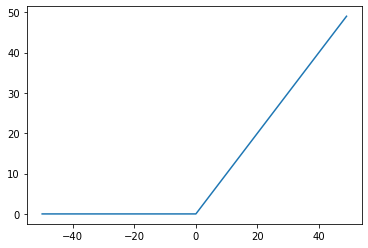

In [52]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-50, 50)
plt_funcrion(relu, x)

* Relu関数
___

# 出力層

### 誤差関数
* 出力結果と正解ラベルと答え合わせを行い、その誤差を得る
* 二乗誤差、交差エントロピー誤差などがある
___

### 二乗誤差(MSE)
$$E=-\sum_i^N(y_i-\hat{y}_i)^2$$
* 回帰問題でよく利用される
* 標準正規分布を仮定した場合の最尤推定の結果と一致する
___

### 交差エントロピー誤差
$$E=-\sum_i^Ny_ilog(\hat{y}_i)$$
* 分類問題でよく利用される
___

### 確認テスト⑧
#### Q.
なぜ、引き算でなく二乗するか述べよ\
下式の1/2はどういう意味を持つか述べよ
#### A.
* 常に正とするため。絶対値をとるMAEも存在する
* 微分計算の時に打消しあって、式が簡単になるため
___

### 出力層の活性化関数
* 出力層と中間層で利用される活性化関数が異なる
* 確率出力として利用する場合、総和を1とする必要がある
___

### シグモイド関数
$$f(x)=\frac1{1+e^{-x}}$$
* 2値分類の出力層に利用される
___

### ソフトマックス関数
$$f(i,x)=\frac{e^{x_i}}{\sum_{k=1}^Ke^{x_k}}$$
* 多クラス分類の出力層に利用される
* 入力値ベクトルの各要素を確率値に相当する出力値ベクトルに変換する
___

### 確認テスト⑨
#### Q.
①~③の数式に該当するソースコードを示し、一行づつ処理の説明をせよ。